In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Check for outliers
from scipy.stats import zscore

#Data Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
#Lets import the required dataset
df=pd.read_csv('Micro_Loan.csv',parse_dates=['pdate'])
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
#Dropping Unnamed column because it has no use in our dataset.
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Feature Information: 1.label Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}.

2. msisdn    mobile number of user.
3. aon    age on cellular network in days
4. daily_decr30    Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).
5. daily_decr90    Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah).
6. rental30    Average main account balance over last 30 days.
7. rental90    Average main account balance over last 90 days.
8. last_rech_date_ma    Number of days till last recharge of main account.
9. last_rech_date_da    Number of days till last recharge of data account.
10. last_rech_amt_ma    Amount of last recharge of main account (in Indonesian Rupiah).
11. cnt_ma_rech30    Number of times main account got recharged in last 30 days.
12. fr_ma_rech30    Frequency of main account recharged in last 30 days.
13. sumamnt_ma_rech30    Total amount of recharge in main account over last 30 days (in Indonesian Rupiah).
14. medianamnt_ma_rech30    Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
15.medianmarechprebal30    Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
16. cnt_ma_rech90    Number of times main account got recharged in last 90 days
17. fr_ma_rech90    Frequency of main account recharged in last 90 days
18. sumamnt_ma_rech90    Total amount of recharge in main account over last 90 days (in Indonesian Rupee)
19. medianamnt_ma_rech90    Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupee)
20. medianmarechprebal90    Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupee)
21. cnt_da_rech30    Number of times data account got recharged in last 30 days
22. fr_da_rech30    Frequency of data account recharged in last 30 days
23. cnt_da_rech90    Number of times data account got recharged in last 90 days
24. fr_da_rech90    Frequency of data account recharged in last 90 days
25. cnt_loans30    Number of loans taken by user in last 30 days
26. amnt_loans30    Total amount of loans taken by user in last 30 days
27. maxamnt_loans30    maximum amount of loan taken by the user in last 30 days
28. medianamnt_loans30    Median of amounts of loan taken by the user in last 30 days
29. cnt_loans90    Number of loans taken by user in last 90 days
30.amnt_loans90    Total amount of loans taken by user in last 90 days
31. maxamnt_loans90    maximum amount of loan taken by the user in last 90 days
32. medianamnt_loans90    Median of amounts of loan taken by the user in last 90 days
33. payback30    Average payback time in days over last 30 days
34. payback90    Average payback time in days over last 90 days
35. pcircle    telecom circle
36. pdate    date

In [6]:
#Lets Check the shape of the dataset
df.shape

(209593, 36)

In [7]:
#Lets Check the coulumns name
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
#lets chcek the datatypes
df.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [9]:
#Lets Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

Finding:

1. 209593 row with 36 features in this dataset.
2. No null value present in this dataset.
3. 2 features is object type and others features int or float type.
4. msisdn is object type so check during the data cleansing.

## Check Missing Value

In [10]:
#lets check the null vales without usig visualisation
df.isnull().sum()
#here we can see in above dataset there are no null values

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

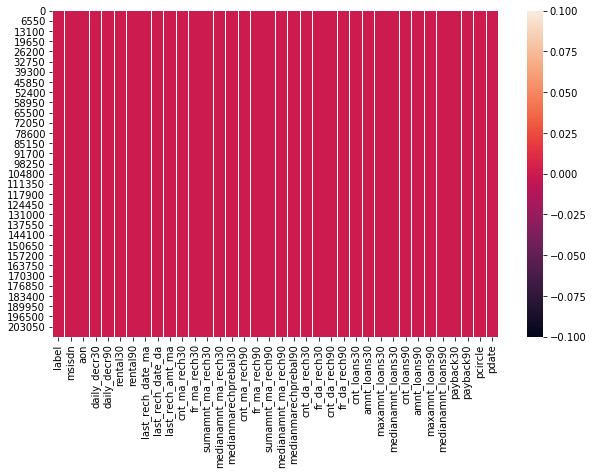

In [11]:
#Let's check null value using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

## Data Cleaning - pdate

In [12]:
# From pdate we can get mothly ,daily,yearly average counts  which can help in data analysis
df_dates=pd.DataFrame()
df_dates['month']=df['pdate'].dt.month_name()
df_dates['year']=df['pdate'].dt.year
df_dates['day']=df['pdate'].dt.day_name()
df_dates['label']=df['label']
df_dates

,month,year,day,label
0,July,2016,Wednesday,0
1,August,2016,Wednesday,1
2,August,2016,Friday,1
3,June,2016,Monday,1
4,June,2016,Wednesday,1
...,...,...,...,...
209588,June,2016,Friday,1
209589,June,2016,Sunday,1
209590,July,2016,Friday,1
209591,July,2016,Monday,1


In [13]:
df_dates['month'].value_counts()

July      85765
June      83154
August    40674
Name: month, dtype: int64

In [14]:
# Checking the total number of distict year
df_dates['year'].drop_duplicates()

0    2016
Name: year, dtype: int64

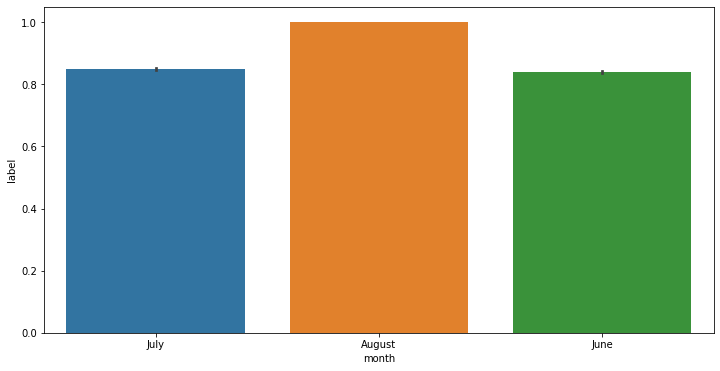

In [15]:
# average label during month of an year 
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='label',data=df_dates)
plt.show()
# it shows average label is increaseing from jun to august

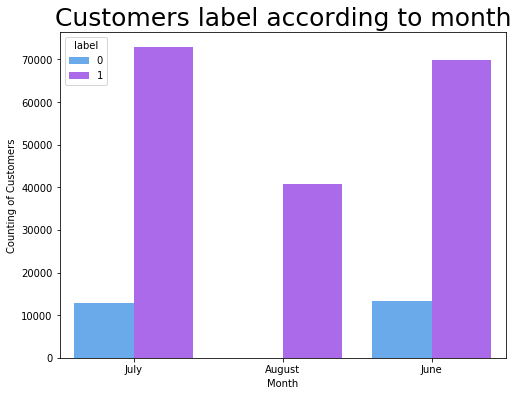

In [16]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="month", hue='label', data=df_dates, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

Finding:

1. Only 2016 year data present.
2. Jun to August in 2016 data present in this dataset.
3. In August no any defaulter in the dataset.
4. Non defaluter number is more than the defaluter so dataset inbalance according to lebel.

In [18]:
#Dropping the pdate columns because pdate not affect the outcome leabel.
df.drop(columns=['pdate'],axis=1, inplace = True)

## Summary Statistics

In [19]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observation:

1. mean is greater than median in all features.
2. Difference between 75% and max is very huge so maximun features have lots of outliers.

In [20]:
#Check Correlation
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


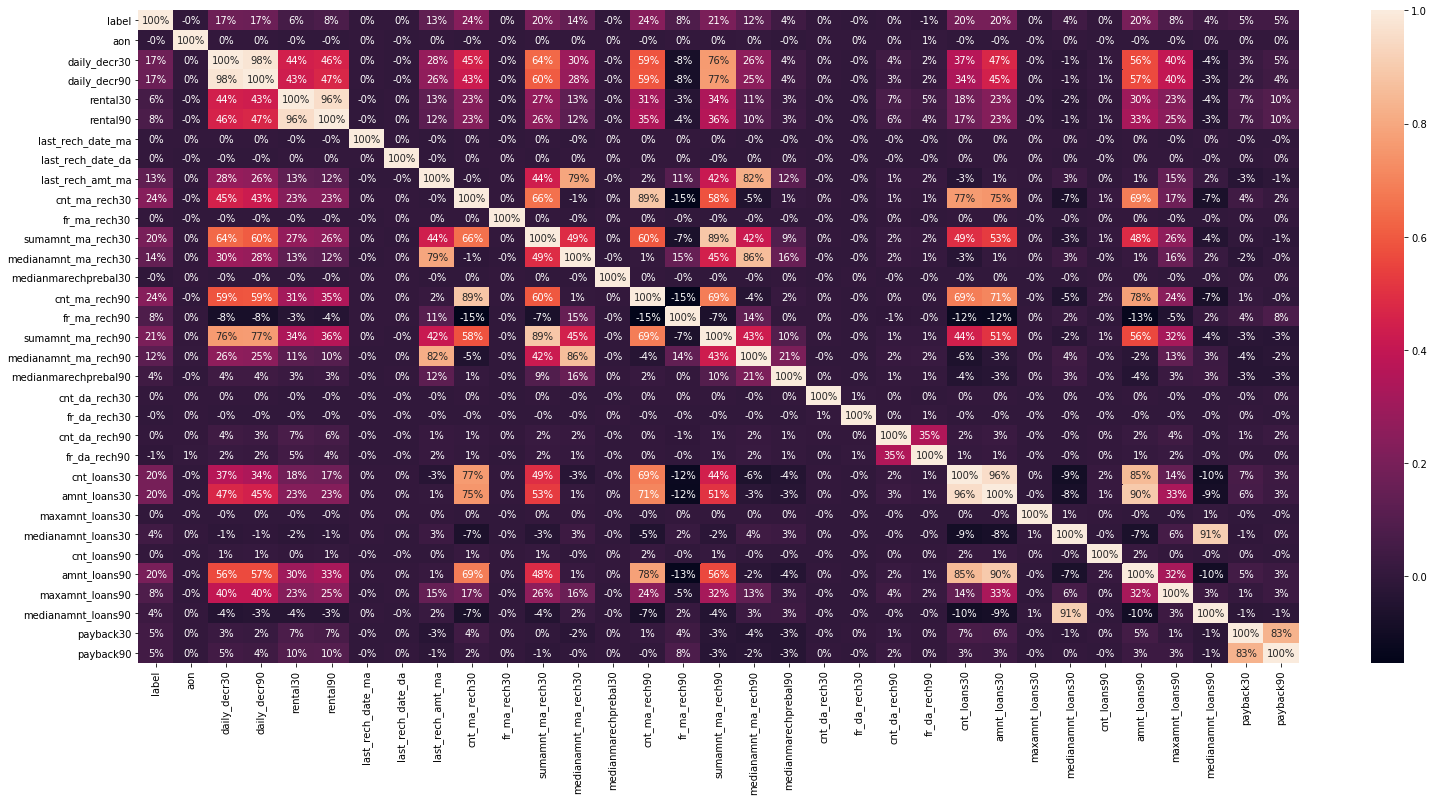

In [21]:
#Check correlation with heatmap
plt.figure(figsize=(26,12))
sns.heatmap(df.corr(),annot=True,fmt='0.0%')

Observation:

1. daily_decr30 and daily_decr90 features are highly correlated with each other.
2. rental30 and rental90 features are highly correlated with each other.
3. cnt_loans30 and amount_loans30 columns are highly correlated with each other.
4. amount_loans30 is also highly correlated with amount_loans90 column.
5. medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.

In [22]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 35
>>> Number of categorical features:: 2
>>> Number of Numerical Feature:: 33


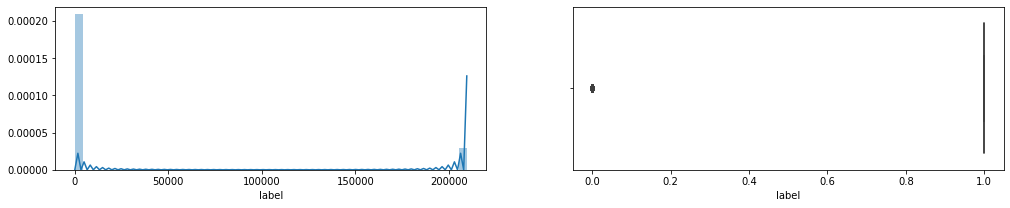

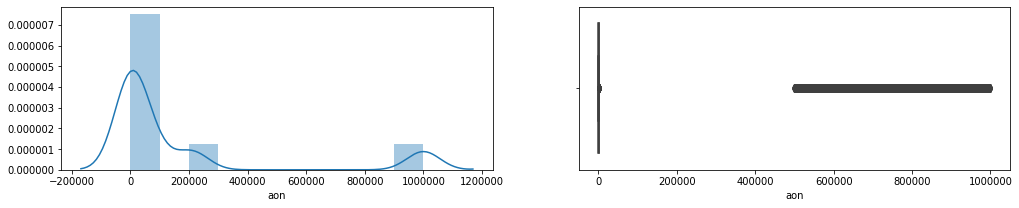

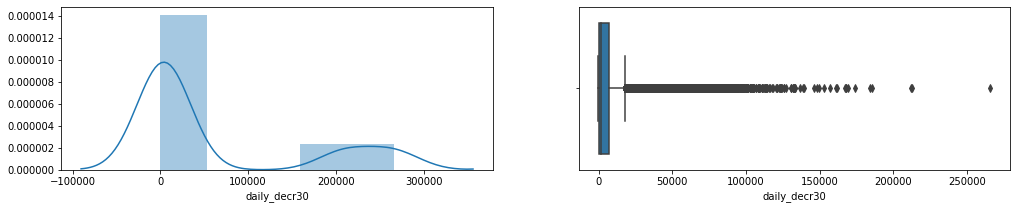

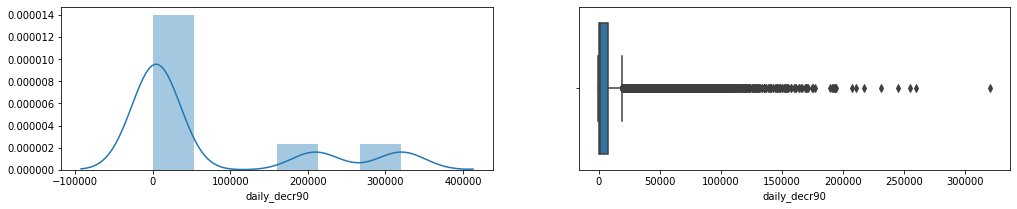

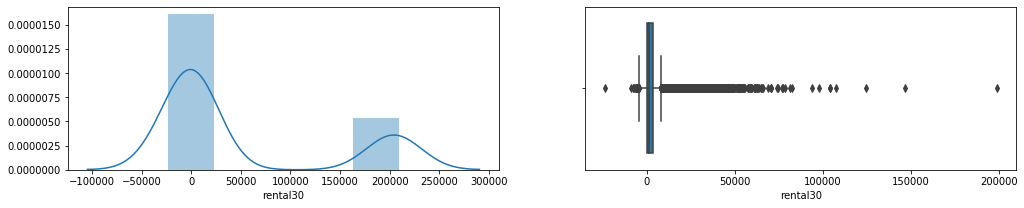

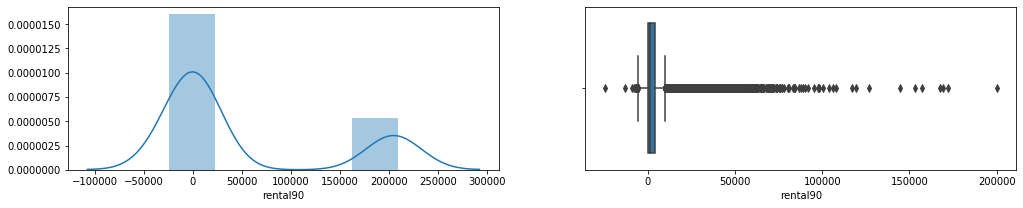

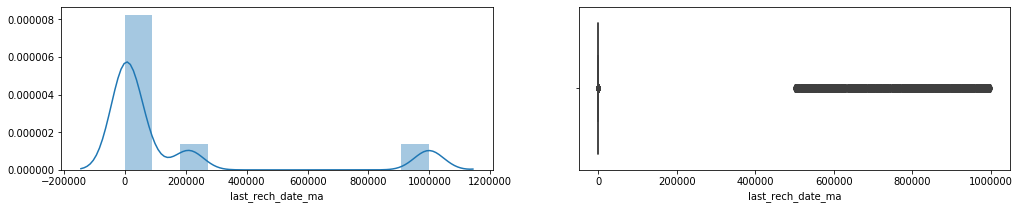

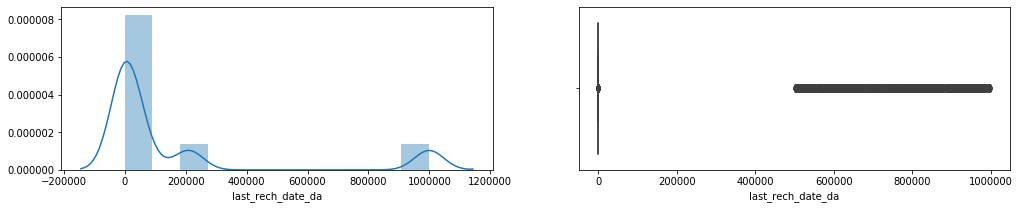

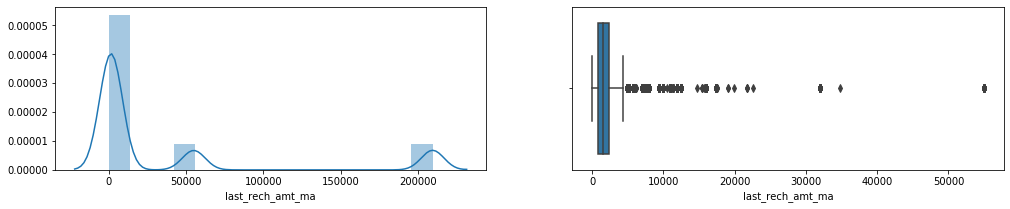

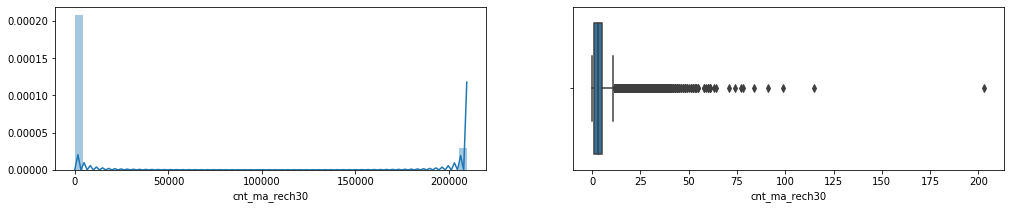

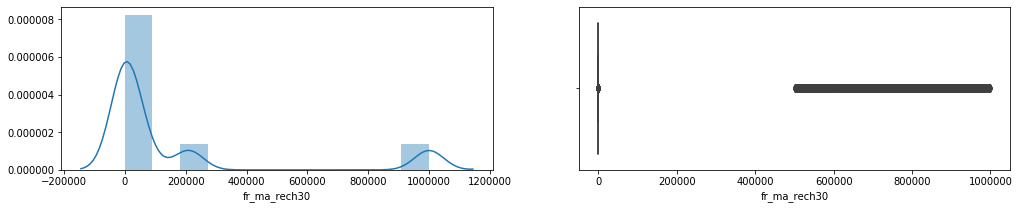

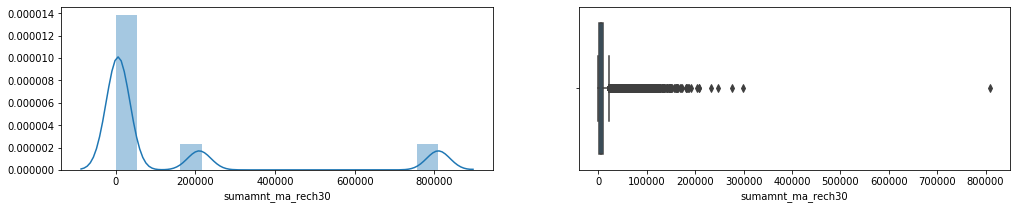

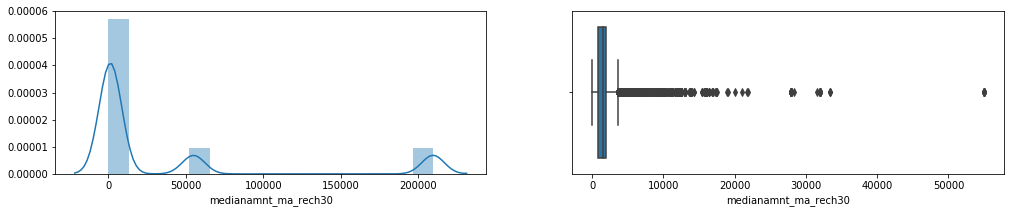

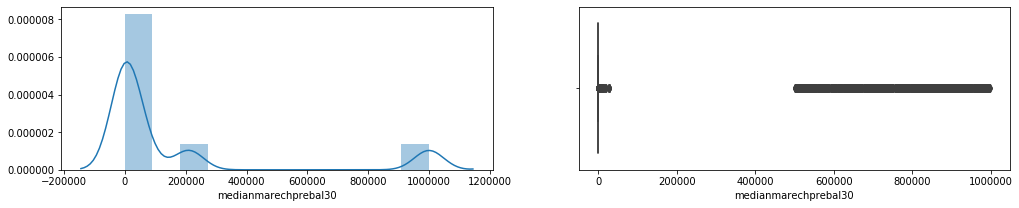

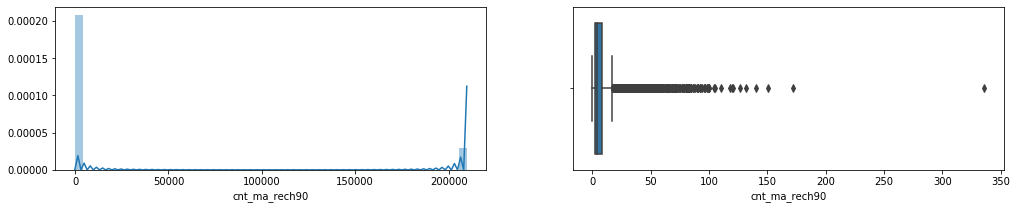

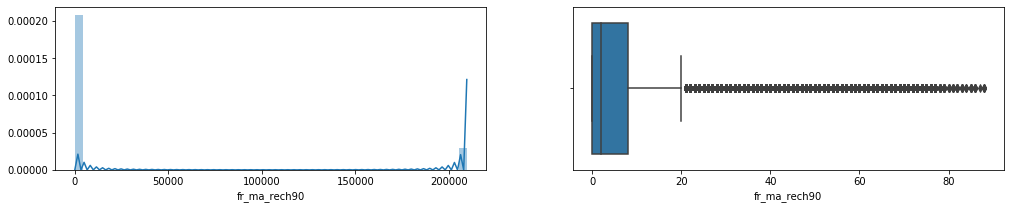

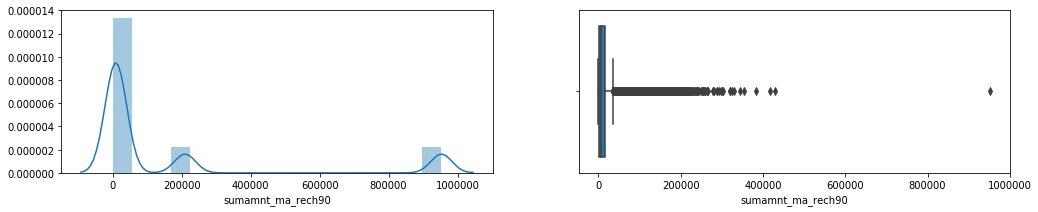

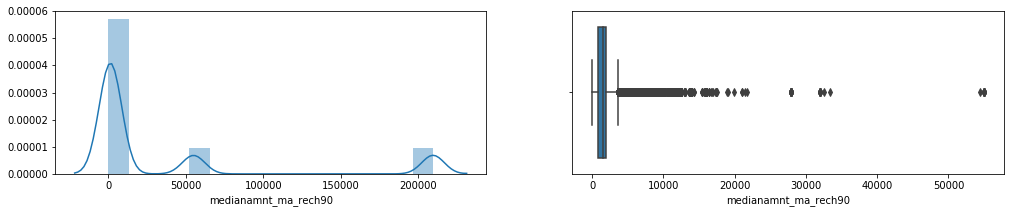

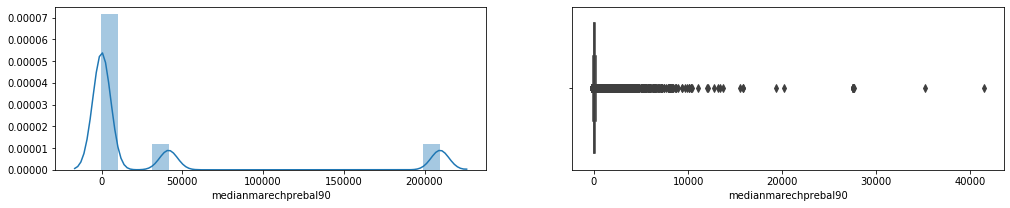

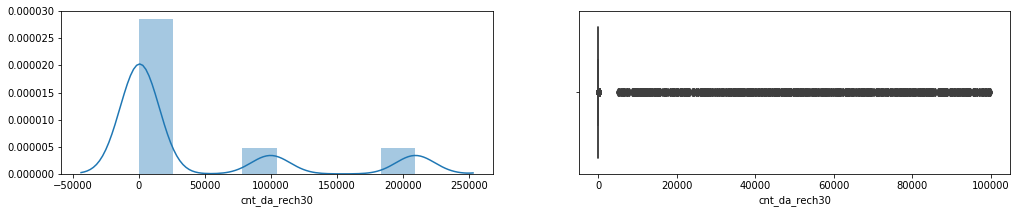

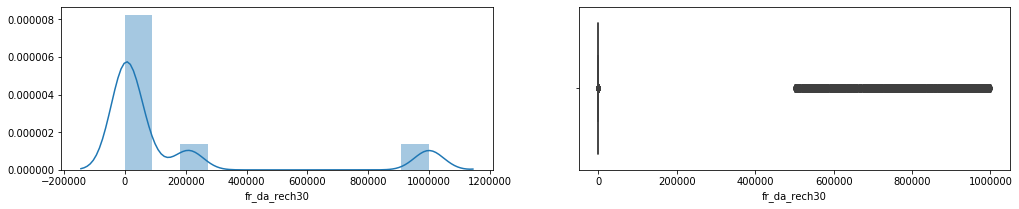

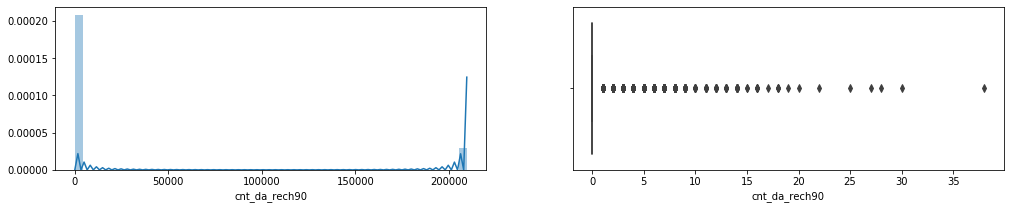

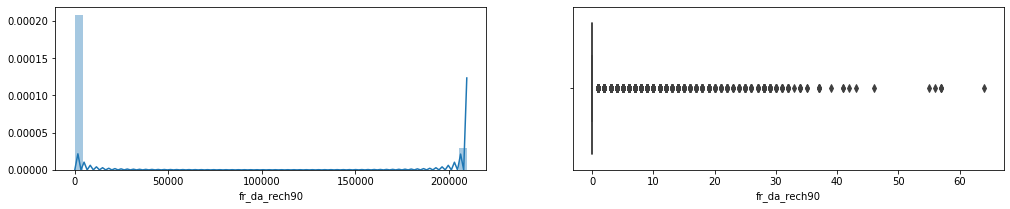

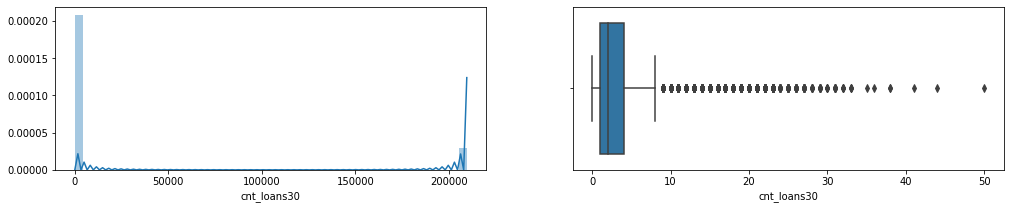

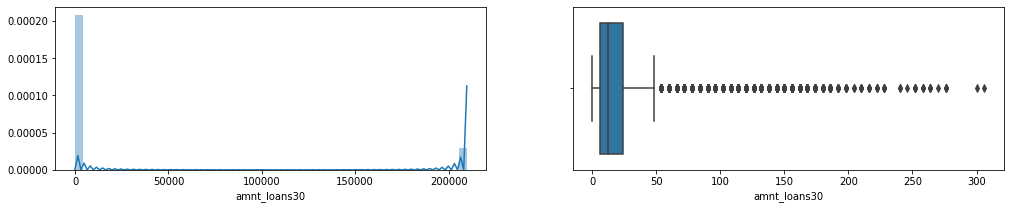

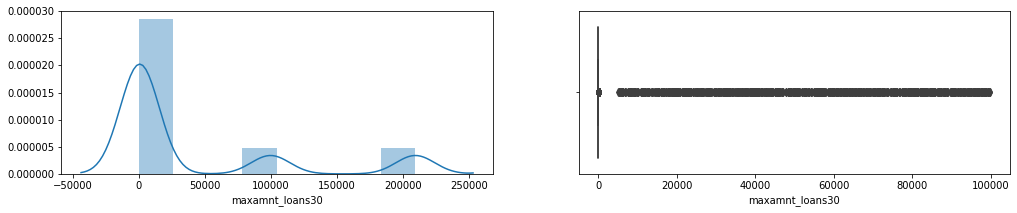

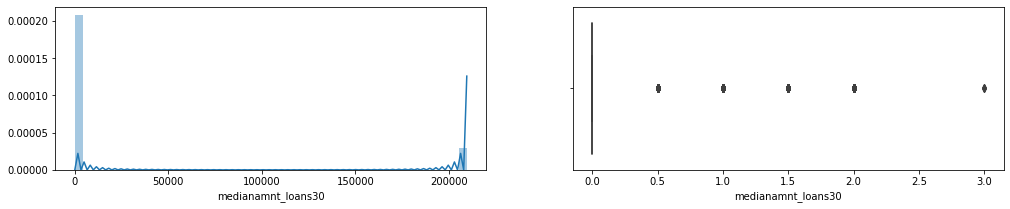

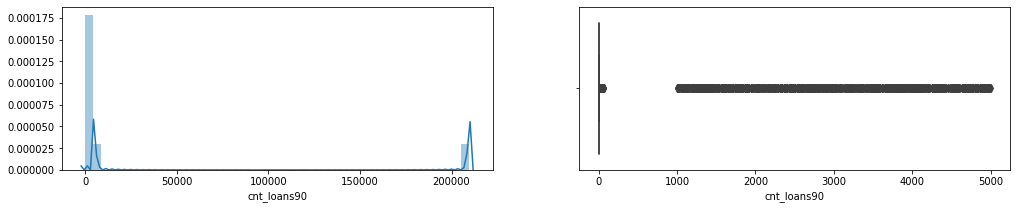

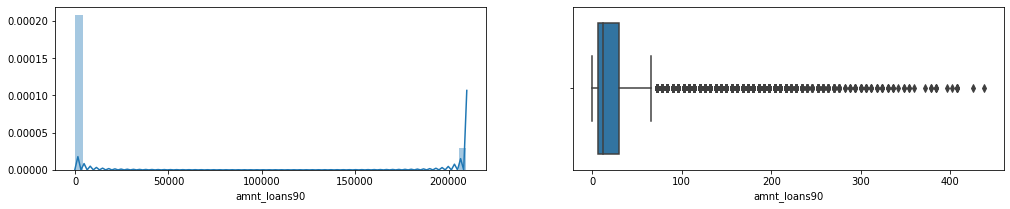

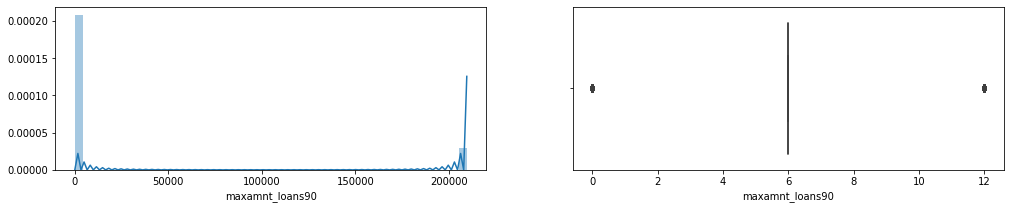

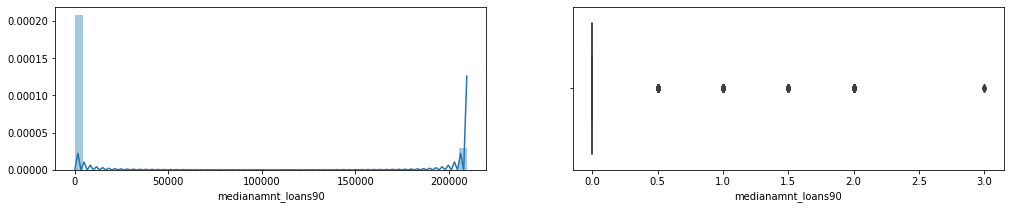

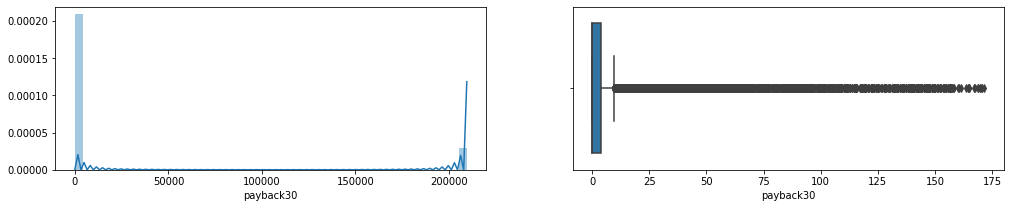

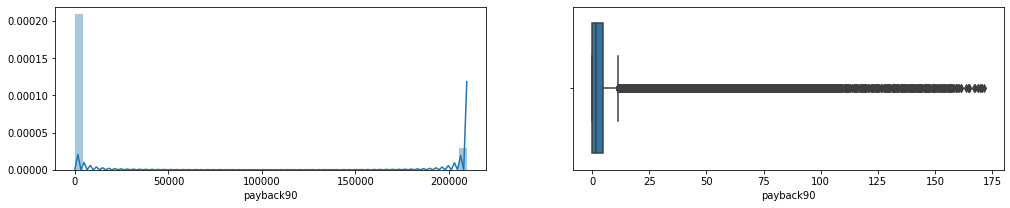

In [23]:
#univariate analysis of numerical feature
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i].describe())
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

Observation:

1. Lots of outliers present in maximum features.
2. Maximum faetures are right skewed and some features left skewed.
3. Which features highly correlated conatain approx 100% contain same data.

In [24]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

In [25]:
#Now checking the shape
df.shape

(209593, 31)

## Exploring the Data Variables

In [26]:
#lets check each varibele number of unique value only
print('>>>Number of unique value in df<<<')
for i in df:
    print(i,'--->',df[i].nunique())

>>>Number of unique value in df<<<
label ---> 2
msisdn ---> 186243
aon ---> 4507
daily_decr90 ---> 158670
rental90 ---> 141033
last_rech_date_ma ---> 1186
last_rech_date_da ---> 1174
last_rech_amt_ma ---> 70
cnt_ma_rech30 ---> 71
fr_ma_rech30 ---> 1083
sumamnt_ma_rech30 ---> 15141
medianamnt_ma_rech30 ---> 510
medianmarechprebal30 ---> 30428
cnt_ma_rech90 ---> 110
fr_ma_rech90 ---> 89
sumamnt_ma_rech90 ---> 31771
medianamnt_ma_rech90 ---> 608
medianmarechprebal90 ---> 29785
cnt_da_rech30 ---> 1066
fr_da_rech30 ---> 1072
cnt_da_rech90 ---> 27
fr_da_rech90 ---> 46
cnt_loans30 ---> 40
maxamnt_loans30 ---> 1050
cnt_loans90 ---> 1110
amnt_loans90 ---> 69
maxamnt_loans90 ---> 3
medianamnt_loans90 ---> 6
payback30 ---> 1363
payback90 ---> 2381
pcircle ---> 1


## Data Cleaning - msisdn

In [27]:
# drop duplicate entry of mobile number because mobile number is ubique identity of the user
df= df.drop_duplicates(subset='msisdn', keep="first")

In [28]:
df.shape

(186243, 31)

## Data Cleaning - pcircle

In [29]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [30]:
#Dropping the pcircle column because only one area coverd 'UPW' in the dataset
df.drop(columns=['pcircle'],axis=1, inplace = True)

## Data Cleaning - maxamnt_loans90

In [31]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

In [32]:
# We are going to drop those rows which maxamnt_loans90 is 0.Because 0 loan amount represent no loan history.
df.drop(axis=0, index=df[df['maxamnt_loans90']== 0].index, inplace=True)

In [33]:
df['maxamnt_loans90'].unique()

array([ 6, 12], dtype=int64)

In [34]:
df.shape

(184216, 30)

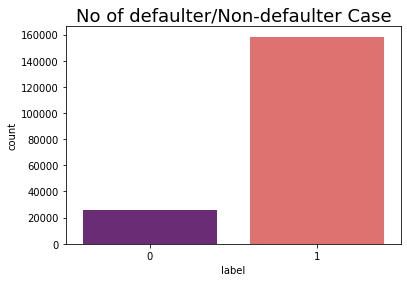

1    158356
0     25860
Name: label, dtype: int64


In [35]:
#Checking the number of Fraud cases beacuse my dataset is inbalance
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

## Data Cleaning - aon

In [36]:
(df['aon']>1825).value_counts()

False    176826
True       7390
Name: aon, dtype: int64

My assumption when the customer used one cellular network last 5 year or more than generally customer satisfied with the  service  of the network so maximum chances it’s not deviate from loan amount.if deviate so may be other region regarding to services.

In [37]:
# for loan history of the customer i have consider only 5 year data consider
df.drop(axis=0, index=df[df['aon']>1825].index, inplace=True)

In [38]:
df.shape

(176826, 30)

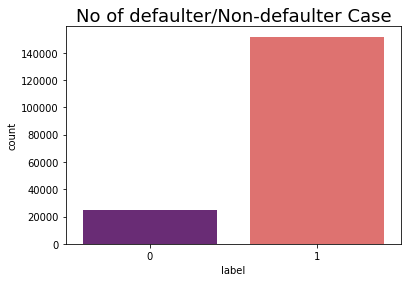

1    151789
0     25037
Name: label, dtype: int64


In [39]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

Conclusion: Total 7390 customer use the last 5 years one network and approx 900 customers out of 7390 not pay our loan amount.

## Data Cleaning - medianamnt_loans90

In [40]:
df['medianamnt_loans90'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [41]:
for i in df.columns:
    print(i)
    print('Number of unique value--->',df[i].unique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('+++++++++++++++++++++++++++++++++++++++++++')

label
Number of unique value---> [0 1]
[0 1]
+++++++++++++++++++++++++++++++++++++++++++
msisdn
Number of unique value---> ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
count          176826
unique         176826
top       60604I84453
freq                1
Name: msisdn, dtype: object
+++++++++++++++++++++++++++++++++++++++++++
aon
Number of unique value---> [ 2.720e+02  7.120e+02  5.350e+02 ...  1.628e+03  1.822e+03 -1.000e+00]
count    176826.000000
mean        609.187467
std         444.613330
min         -48.000000
25%         233.000000
50%         495.000000
75%         907.000000
max        1825.000000
Name: aon, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++
daily_decr90
Number of unique value---> [ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]
count    176826.000000
mean       5600.002590
std       10269.763361
min         -46.215000
25%          37.447917
50%        1269.6

Name: fr_ma_rech30, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++
sumamnt_ma_rech30
Number of unique value---> [ 3078.  5787.  1539. ... 37270. 49088. 12154.]
count    176826.000000
mean       7181.635116
std        9684.565165
min           0.000000
25%        1539.000000
50%        4617.000000
75%        9277.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++
medianamnt_ma_rech30
Number of unique value---> [ 1539.   5787.      0.   2309.   3178.    773.   1156.   4532.5  4773.5
   770.   4769.5   771.5  1543.    473.   1160.   6024.   1547.   1154.5
  4048.   8000.   1924.   3178.5  2020.   2793.5  3613.   1243.   5352.
  2593.   7526.   1928.   2410.5  2320.   7480.    173.    947.   1158.5
   856.  10000.   1720.   2551.   4385.    860.   5804.   8830.5  1541.
  1247.   1731.5  2120.   5154.5  5814.  11900.5   471.5  1353.   2743.5
  3663.   1633.5  2409.   4067.   1539.5  4149.5 11874.   4917.   1347.
  11

Name: medianmarechprebal90, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++
cnt_da_rech30
Number of unique value---> [0.00000000e+00 3.07214638e+04 9.17643917e+04 1.00000000e+00
 2.00000000e+00 4.00000000e+00 8.00000000e+00 1.10391421e+04
 9.88085231e+04 4.87541408e+04 1.92862817e+04 5.19805303e+04
 8.19107624e+04 6.29716488e+04 5.68746096e+04 8.47492865e+04
 3.00000000e+00 5.32534132e+04 1.00485400e+04 4.88867924e+04
 5.79778573e+04 9.64583778e+04 1.40000000e+01 9.20706981e+04
 1.06223154e+04 1.99150109e+04 1.19739217e+04 8.27812436e+04
 9.45801591e+03 6.00000000e+00 5.81692609e+04 6.76295006e+04
 9.38589512e+04 1.89369174e+04 8.47973873e+04 4.59080535e+04
 9.64303514e+04 2.27558068e+04 6.78650807e+04 9.32692526e+04
 4.90597863e+04 5.73163378e+04 3.46046107e+04 8.04302658e+04
 7.34715343e+04 1.26534481e+04 1.82614116e+04 1.10000000e+01
 7.00000000e+00 3.42725280e+04 6.99787173e+04 8.95966941e+04
 7.23728668e+03 7.46409296e+04 2.70472549e+04 8.01132981e+04
 4.41502696e+04 5.

Name: cnt_loans30, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++
maxamnt_loans30
Number of unique value---> [6.00000000e+00 1.20000000e+01 0.00000000e+00 6.19076974e+04
 2.20994137e+04 9.87459340e+04 5.89253641e+04 7.82324643e+04
 2.85748310e+04 7.15329354e+04 8.32074956e+04 3.40443620e+04
 4.32213892e+04 6.04173139e+03 2.77930986e+04 5.57238580e+04
 6.72114613e+03 4.56835960e+04 5.63830805e+04 8.19424671e+04
 8.64168788e+04 4.50736302e+04 3.73414255e+04 7.56894113e+04
 1.44533176e+04 3.19063270e+04 3.04231047e+04 9.84161892e+04
 9.28913547e+04 5.94725589e+04 7.35390258e+04 6.46459347e+04
 1.80917470e+04 8.12608299e+04 2.34832696e+04 1.92326012e+04
 4.06188760e+04 8.13810212e+04 6.74644291e+04 8.95592162e+04
 2.03380522e+04 1.32614795e+04 5.55232465e+04 5.17908574e+04
 1.14667799e+04 1.91140474e+04 9.03040897e+04 8.98980809e+04
 9.05772027e+04 4.96696087e+04 5.40370977e+03 2.83195900e+04
 5.71443242e+04 7.53499190e+04 2.65211958e+04 8.07985637e+04
 3.86945207e+04 7.7786856

Number of unique value---> [0.  1.  0.5 2.  1.5 3. ]
[0.  1.  0.5 2.  1.5 3. ]
+++++++++++++++++++++++++++++++++++++++++++
payback30
Number of unique value---> [29.          0.          2.33333333 ... 20.625      64.33333333
  5.61538462]
count    176826.000000
mean          3.381157
std           9.033105
min           0.000000
25%           0.000000
50%           0.000000
75%           3.666667
max         171.500000
Name: payback30, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++
payback90
Number of unique value---> [29.          0.          2.33333333 ...  1.97297297 64.33333333
  5.23529412]
count    176826.000000
mean          4.358917
std          10.603633
min           0.000000
25%           0.000000
50%           1.333333
75%           4.500000
max         171.500000
Name: payback90, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++


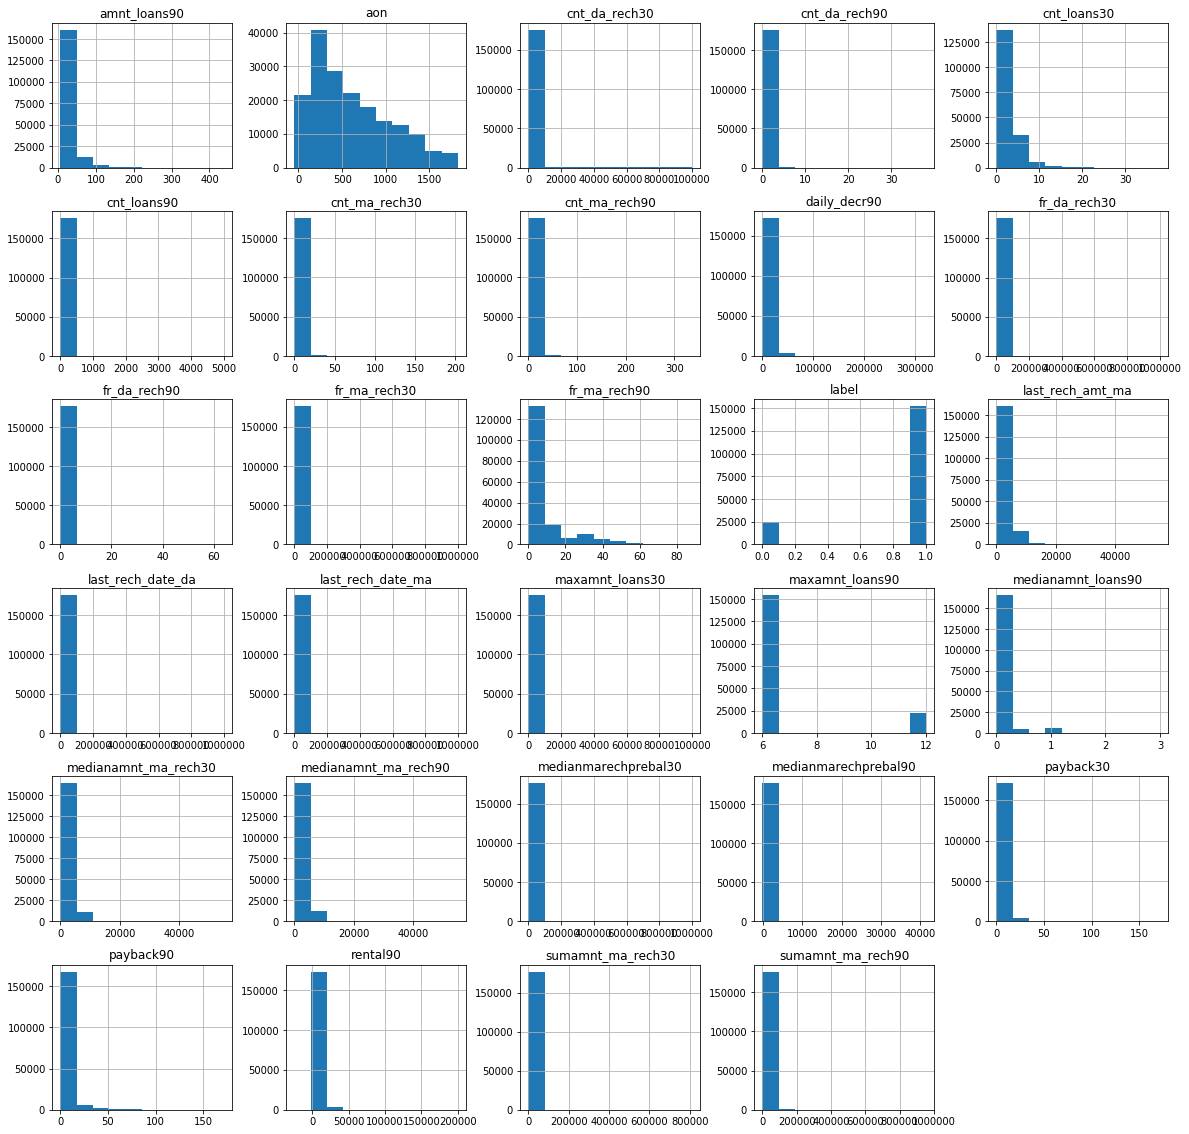

In [42]:
df.hist(figsize=(20,20))
plt.show()

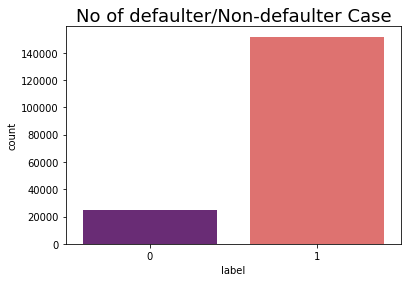

1    151789
0     25037
Name: label, dtype: int64


In [43]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

Observation: Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not been payed i.e. defaulter and according to level dataset is inbalance because number of defaulter is minimum comaprion to non defaulter in the dataset.

## EDA Concluding Reamrk

1.There are no null values in the dataset.
2.The dataset is imbalanced. Label ‘1’ has approximately 86% records, while, label ‘0’ has approximately 14% records.
3.maxamnt_loans90 columns gives information about customers with no loan history.
4.msisdn and aon features some values which might not be realistic. So drop the row which contain not realistic value.
5.There are some rows which is repeated means duplicate entries are present in our dataset.
6.The collected data is only for one Telecom circle area.

## Check Skewness

In [44]:
#lets chcek the skewness in the dataset
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

label                   -2.056114
aon                      0.760463
daily_decr90             4.361852
rental90                 4.498908
last_rech_date_ma       14.867165
last_rech_date_da       14.724430
last_rech_amt_ma         3.707850
cnt_ma_rech30            3.493660
fr_ma_rech30            14.828454
sumamnt_ma_rech30        7.314121
medianamnt_ma_rech30     3.274604
medianmarechprebal30    14.685433
cnt_ma_rech90            3.590395
fr_ma_rech90             2.261259
sumamnt_ma_rech90        5.356440
medianamnt_ma_rech90     3.557356
medianmarechprebal90    43.036189
cnt_da_rech30           17.776333
fr_da_rech30            14.738012
cnt_da_rech90           28.449153
fr_da_rech90            29.047510
cnt_loans30              2.759313
maxamnt_loans30         17.703811
cnt_loans90             16.688123
amnt_loans90             3.181130
maxamnt_loans90          2.281892
medianamnt_loans90       4.730710
payback30                8.126283
payback90                6.704319
dtype: float64

In [45]:
#lets treat the skewness in the dataset
#import numpy as np
#for index in df.skew().index:
#    if df.skew().loc[index]>0.5:
#       df[index]=np.log1p(df[index])
#    if df.skew().loc[index]<-0.5:
#        df[index]=np.square(df[index])

In [46]:
df

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,0,0,2,6.0,2.0,12,6,0.0,29.000000,29.000000
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,0,0,1,12.0,1.0,12,12,0.0,0.000000,0.000000
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,0,0,1,6.0,1.0,6,6,0.0,0.000000,0.000000
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,0,0,2,6.0,2.0,12,6,0.0,0.000000,0.000000
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,0,0,7,6.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,1,12227I90843,793.0,5356.210000,640.20,2.0,0.0,2309,4,16.0,...,0,0,5,6.0,5.0,30,6,0.0,5.200000,5.200000
209587,1,19900I95200,239.0,14704.900000,16775.60,8.0,0.0,3178,3,3.0,...,0,0,1,12.0,3.0,24,12,1.0,0.000000,30.000000
209588,1,22758I85348,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,...,0,0,2,6.0,2.0,12,6,0.0,1.000000,1.000000
209591,1,59712I82733,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,...,1,0,2,12.0,3.0,24,12,0.0,0.000000,10.500000


In [47]:
#Dropping the msisdn columns beause it's unique identity of each customer but not affect yhe outcome
df.drop(columns=['msisdn'],axis=1,inplace=True)

## Removing Outliers

In [48]:
#Creating a copy of our dataset
df1=df.copy()

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[2.46223219, 0.75838577, 0.24682747, ..., 0.23673526, 2.83611397,
        2.32384054],
       [0.40613554, 0.23124098, 0.63533751, ..., 0.23673526, 0.37430837,
        0.41107882],
       [0.40613554, 0.16685887, 0.40916371, ..., 0.23673526, 0.37430837,
        0.41107882],
       ...,
       [0.40613554, 0.46149774, 0.53050352, ..., 0.23673526, 0.26360416,
        0.31677125],
       [0.40613554, 2.52537572, 0.67911858, ..., 0.23673526, 0.37430837,
        0.57915061],
       [0.40613554, 2.18575381, 0.10372056, ..., 0.23673526, 0.37430837,
        0.41107882]])

In [50]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 176815, 176817, 176822], dtype=int64), array([13, 13, 28, ...,  2,  2, 26], dtype=int64))


In [51]:
df1_new=df1[(z<3).all(axis=1)]

In [52]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(176826, 29) 		 (140510, 29)


Observation: Maximum row detect as outliers but not remove the outliers beacuse dataset is inbalance and if we remove the outliers than some row detect which contain information about defaulte

In [53]:
df.dtypes

label                     int64
aon                     float64
daily_decr90            float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
maxamnt_loans30         float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
dtype: object

## Model Training

In [54]:
#Splitting the data into x and y
x = df.drop(['label'], axis=1)
y = df['label']

In [55]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(176826, 28) 		 (176826,)


In [56]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [57]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [58]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(141460, 28) 		 (35366, 28)


In [59]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(141460,) 	 (35366,)


In [60]:
#Lets chcek logistic regression
from sklearn.linear_model import LogisticRegression

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [61]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=15,random_state=None,shuffle=False)

In [62]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [63]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  175  4833]
 [  101 30257]]
0.8604874738449358
              precision    recall  f1-score   support

           0       0.63      0.03      0.07      5008
           1       0.86      1.00      0.92     30358

    accuracy                           0.86     35366
   macro avg       0.75      0.52      0.50     35366
weighted avg       0.83      0.86      0.80     35366



In [64]:
#Lets chcek random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2202  2806]
 [  705 29653]]
0.9007238590736866
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      5008
           1       0.91      0.98      0.94     30358

    accuracy                           0.90     35366
   macro avg       0.84      0.71      0.75     35366
weighted avg       0.89      0.90      0.89     35366



In [66]:
#since it is imbalanced dataset so we will focus on auc-roc scor
#Use Under Sampling
from collections import Counter
Counter(y_train)

Counter({1: 121431, 0: 20029})

In [67]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(.8)
x_train_ns,y_train_ns = ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 121431, 0: 20029})
The number of classes after fit Counter({1: 25036, 0: 20029})


In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [69]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3701  1307]
 [22017  8341]]
0.3404965220833569
              precision    recall  f1-score   support

           0       0.14      0.74      0.24      5008
           1       0.86      0.27      0.42     30358

    accuracy                           0.34     35366
   macro avg       0.50      0.51      0.33     35366
weighted avg       0.76      0.34      0.39     35366



## Over Sampling

In [70]:
from imblearn.over_sampling import RandomOverSampler

In [71]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 121431, 0: 20029})
The number of classes after fit Counter({1: 121431, 0: 91073})


In [72]:
#Let's check random forest
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [73]:
y_pred=RFclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2545  2463]
 [ 1112 29246]]
0.8989142113894701
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      5008
           1       0.92      0.96      0.94     30358

    accuracy                           0.90     35366
   macro avg       0.81      0.74      0.76     35366
weighted avg       0.89      0.90      0.89     35366



In [74]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred)
print("AUC_Score:",auc_score)

AUC_Score: 0.7357786734847014


In [75]:
#lets check gaussain nb
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_os,y_train_os)

GaussianNB()

In [76]:
y_pred=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4352   656]
 [14387 15971]]
0.5746479669739297
              precision    recall  f1-score   support

           0       0.23      0.87      0.37      5008
           1       0.96      0.53      0.68     30358

    accuracy                           0.57     35366
   macro avg       0.60      0.70      0.52     35366
weighted avg       0.86      0.57      0.64     35366



In [77]:
#Lets check decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_os,y_train_os)

DecisionTreeClassifier()

In [78]:
y_pred_dt=dtc.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[ 2393  2615]
 [ 2588 27770]]
0.8528812984222134
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      5008
           1       0.91      0.91      0.91     30358

    accuracy                           0.85     35366
   macro avg       0.70      0.70      0.70     35366
weighted avg       0.85      0.85      0.85     35366



In [79]:
#Lets check extra tree
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_os,y_train_os)

ExtraTreesClassifier()

In [80]:
y_pred_et=etc.predict(x_test)
print(confusion_matrix(y_test,y_pred_et))
print(accuracy_score(y_test,y_pred_et))
print(classification_report(y_test,y_pred_et))

[[ 2039  2969]
 [  798 29560]]
0.8934852683368206
              precision    recall  f1-score   support

           0       0.72      0.41      0.52      5008
           1       0.91      0.97      0.94     30358

    accuracy                           0.89     35366
   macro avg       0.81      0.69      0.73     35366
weighted avg       0.88      0.89      0.88     35366



In [81]:
#Lets check bagging 
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train_os,y_train_os)

BaggingClassifier()

In [82]:
y_pred_bc=bc.predict(x_test)
print(confusion_matrix(y_test,y_pred_bc))
print(accuracy_score(y_test,y_pred_bc))
print(classification_report(y_test,y_pred_bc))

[[ 2777  2231]
 [ 2091 28267]]
0.8777922298252558
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      5008
           1       0.93      0.93      0.93     30358

    accuracy                           0.88     35366
   macro avg       0.75      0.74      0.75     35366
weighted avg       0.88      0.88      0.88     35366



In [83]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_bc)
print("AUC_Score:",auc_score)

AUC_Score: 0.7428173621724312


In [84]:
#Lets check gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 6, n_estimators = 200)
gbc.fit(x_train_os,y_train_os)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=200)

In [85]:
y_pred_gbc=gbc.predict(x_test)
print(confusion_matrix(y_test,y_pred_gbc))
print(accuracy_score(y_test,y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

[[ 3505  1503]
 [ 3702 26656]]
0.8528247469320817
              precision    recall  f1-score   support

           0       0.49      0.70      0.57      5008
           1       0.95      0.88      0.91     30358

    accuracy                           0.85     35366
   macro avg       0.72      0.79      0.74     35366
weighted avg       0.88      0.85      0.86     35366



In [86]:
#Lets use xgboost
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [87]:
xgb = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                    reg_alpha=0,
                    reg_lambda=5)
xgb.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_pred_xgb=xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[ 3456  1552]
 [ 2914 27444]]
0.8737205225357688
              precision    recall  f1-score   support

           0       0.54      0.69      0.61      5008
           1       0.95      0.90      0.92     30358

    accuracy                           0.87     35366
   macro avg       0.74      0.80      0.77     35366
weighted avg       0.89      0.87      0.88     35366



In [89]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgb)
print("AUC_Score:",auc_score)

AUC_Score: 0.79705398432802


## SMOTETomek

In [90]:
from imblearn.combine import SMOTETomek

In [91]:
st = SMOTETomek(0.75)
x_train_st,y_train_st = st.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({1: 121431, 0: 20029})
The number of classes after fit Counter({1: 119186, 0: 88828})


In [99]:
#Lets check random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_st,y_train_st)

RandomForestClassifier()

In [100]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4489   519]
 [  547 29811]]
0.9698580557597692
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5008
           1       0.98      0.98      0.98     30358

    accuracy                           0.97     35366
   macro avg       0.94      0.94      0.94     35366
weighted avg       0.97      0.97      0.97     35366



In [107]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred)
print("AUC_Score:",auc_score)

AUC_Score: 0.9391737499597456


In [101]:
#Lets check xgboost
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                     random_state = 45,
                    reg_alpha=2,
                    reg_lambda=5)
xgbc.fit(x_train_st,y_train_st)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=45,
              reg_alpha=2, reg_lambda=5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
y_pred_xgbc=xgbc.predict(x_test)
print(confusion_matrix(y_test,y_pred_xgbc))
print(accuracy_score(y_test,y_pred_xgbc))
print(classification_report(y_test,y_pred_xgbc))

[[ 3204  1804]
 [ 1998 28360]]
0.8924956172595148
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      5008
           1       0.94      0.93      0.94     30358

    accuracy                           0.89     35366
   macro avg       0.78      0.79      0.78     35366
weighted avg       0.89      0.89      0.89     35366



In [103]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgbc)
print("AUC_Score:",auc_score)

AUC_Score: 0.786980872767088


In [104]:
#Finding AUC_Score for XGBoost Classifier

from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgb)
print("AUC_Score:",auc_score)

AUC_Score: 0.4990667938742508


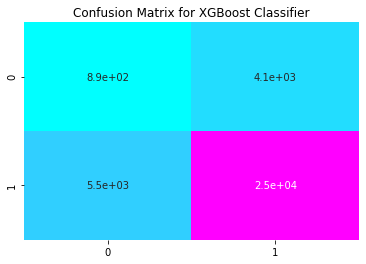

In [105]:
#Plotting Confusion Matrix for XGBoost Classifier.
cm=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm,annot=True,cbar=False,cmap='cool')

plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

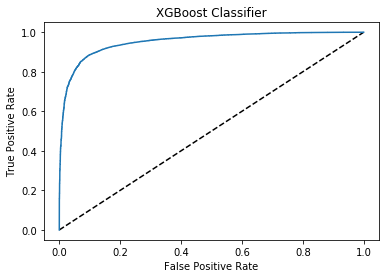

0.4990667938742508


In [106]:

#AUC_ROC Curve of XGBoost Classifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.show()

auc_score=roc_auc_score(y_test,y_pred_xgb)
print(auc_score)

## Model Seclection

1. SMOTETomek Model give the best result.
2. The AUC Score,f1-score and recall value is achive more than 85% when we use Random Forest with SMOTETomek data. So we choose Random Forest model with SMOTETomek data as our final model

In [108]:
#Finding AUC_Score for random forest

from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,classifier.predict(x_test))
print("AUC_Score:",auc_score)

AUC_Score: 0.9391737499597456


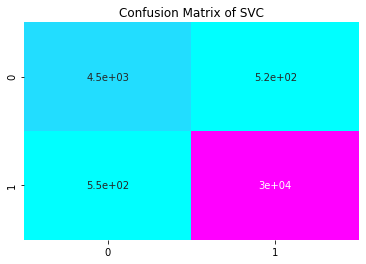

In [109]:
#Plotting Confusion Matrix for SVC.
cm=confusion_matrix(y_test,classifier.predict(x_test))
sns.heatmap(cm,annot=True,cbar=False,cmap='cool')

plt.title("Confusion Matrix of SVC")
plt.show()

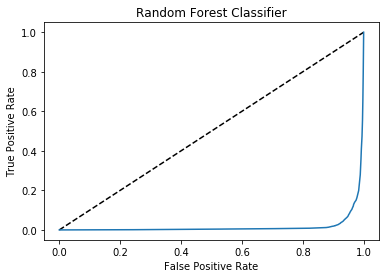

0.9391737499597456


In [110]:
#AUC_ROC Curve of random forest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=classifier.predict_proba(x_test)[:,0]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,classifier.predict(x_test))
print(auc_score)